# 1. Tools for text processing
<p>What are the most frequent words in Lewis Carrol's Alice's adventures in Wonderland and how often do they occur?</p>
<p>In this notebook, I scrape the novel <em>Alice's adventures in Wonderland</em> from the website <a href="https://www.gutenberg.org/">Project Gutenberg</a>. Then I'll extract words from this web data using <code>BeautifulSoup</code> and <code>Requests packages</code>. Finally, I'll dive into analyzing the distribution of words using the Natural Language ToolKit (<code>nltk</code>). </p>
<p>The <em>Data Science pipeline</em> in this notebook can be used to visualize the word frequency distributions of any novel that you can find on the web by parsing the html data.</p>
![](./alice-in-wonderland-knowledge-quiz-header.png)

In [1]:
# Importing requests, BeautifulSoup and nltk
import nltk
from bs4 import BeautifulSoup
import requests

## 2. Request Package
<p>To analyze the book, we need to get the contents of Alice's adventures in wonderland from <em>somewhere</em>. Luckily, the text is available online at Project Gutenberg as an HTML file: https://www.gutenberg.org/files/19033/19033-h/19033-h.htm </p>
<p>To fetch the HTML file with Alice I'm going to use the <code>request</code> package to make a <code>GET</code> request for the website, which means we're <em>getting</em> data from it. This is what you're doing through a browser when visiting a webpage, but now we're getting the requested page directly into python instead. </p>

In [2]:
#Assign the url

url = 'https://www.gutenberg.org/files/19033/19033-h/19033-h.htm'

# Getting the Moby Dick HTML 

r = requests.get(url)

# Setting the correct text encoding of the HTML page

r.encoding = 'utf-8'

# Extracting the HTML from the request object

html = r.text

# Printing the first 5000 characters in html
print(html[:5000])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
    "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<html xmlns="http://www.w3.org/1999/xhtml">
  <head>
    <meta http-equiv="Content-Type" content="text/html;charset=iso-8859-1" />
    <title>
      The Project Gutenberg eBook of Alice's Adventures in Wonderland, by Lewis Carroll
    </title>
    <style type="text/css">
/*<![CDATA[  XML blockout */
<!--
    p {  margin-top: .75em;
         text-align: justify;
         margin-bottom: .75em;
         }
    h1,h2,h4,h5,h6 {
         text-align: center; /* all headings centered */
         clear: both;
         }
    h3  {text-decoration: underline; text-align: center; clear: both;}

    hr { width: 33%;
	 margin-top: 2em;
	 margin-bottom: 2em;
         margin-left: auto;
         margin-right: auto;
         clear: both;
       }

    body{margin-left: 10%;
         margin-right: 10%;
        }
    img
        {border-style: none;
        }

    .pagenum  { /* uncomment the

## 3. Get the text from the HTML
<p>What I need to do now is <em>wrangle</em> this HTML to extract the text of the novel. For this I'll use the package <code>BeautifulSoup</code>.</p>
<p>Firstly, a word on the name of the package: Beautiful Soup? In web development, the term "tag soup" refers to structurally or syntactically incorrect HTML code written for a web page. What Beautiful Soup does best is to make tag soup beautiful again and to extract information from it with ease!. After creating the soup, we can use its <code>.get_text()</code> method to extract the text.</p>

In [3]:
# Creating a BeautifulSoup object from the HTML

soup = BeautifulSoup(html, 'html.parser')

# Getting the text out of the soup

text = soup.get_text()

# Printing out text between characters 30000 and 35000
print(text[30000:35000])

hing to eat or
drink under the circumstances. There was a large mushroom growing near
her, about the same height as herself. She stretched herself up on
tiptoe and peeped over the edge and her eyes immediately met those of a
large blue caterpillar, that was sitting on the top, with its arms
folded, quietly smoking a long hookah and taking not the smallest notice
of her or of anything else.


[Pg 26]
V—ADVICE FROM A CATERPILLAR
At last the Caterpillar took the hookah out of its mouth and addressed
Alice in a languid, sleepy voice.
"Who are you?" said the Caterpillar.

Alice replied, rather shyly, "I—I hardly know, sir, just at present—at
least I know who I was when I got up this morning, but I think I must
have changed several times since then."
"What do you mean by that?" said the Caterpillar, sternly. "Explain
yourself!"[Pg 27]
"I can't explain myself, I'm afraid, sir," said Alice, "because I'm
not myself, you see—being so many different sizes in a day is very
confusing." She drew her

## 4. Extract the words
<p>Now that I have the text of interest, it's time to count how many times each word appears, and for this I'll use <code>nltk</code> – the Natural Language Toolkit. I'll start by tokenizing the text, that is, remove everything that isn't a word (whitespace, punctuation, etc.) and then split the text into a list of words.</p>

In [6]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(text)

# Printing out the first 10 words / tokens 
print(tokens[:10])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Alice', 's', 'Adventures', 'in', 'Wonderland']


## 5. Make the words lowercase
<p>Note that it's possible that some words in the above tokenized text have the same words in either in capital or not but both should be counted as the same word. For this reason, I should build a list of all words in the book in which all capital letters have been made lower case.</p>

In [8]:
# A new list to hold the lowercased words
words = []

# Looping through the tokens and make them lower case
for word in tokens:
     words.append(word.lower())
    

# Printing out the first 10 words / tokens 
print(words[:10])

['the', 'project', 'gutenberg', 'ebook', 'of', 'alice', 's', 'adventures', 'in', 'wonderland']


## 6. Load in stop words
<p>It is common practice to remove words that appear a lot in the English language such as 'the', 'of' and 'a' because they're not so interesting. Such words are known as <em>stop words</em>. The package <code>nltk</code> includes a good list of stop words in English that we can use.</p>

In [9]:
# Getting the English stop words from nltk
from nltk.corpus import stopwords

sw = stopwords.words('english')

# Printing out the first eight stop words

print(sw[:8])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']


## 7. Remove stop words in Alice's adventures in wonderland
<p>We now want to create a new list with all <code>words</code> in the book, except those that are stop words. One way to get this list is to loop over all elements of <code>words</code> and add each word to a new list if they are <em>not</em> in <code>sw</code>.</p>

In [11]:
# A new list to hold Lewis Carrol's book with No Stop words

words_ns = []

# Appending to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Printing the first 5 words_ns to check that stop words are gone
print(words_ns[:5])

['project', 'gutenberg', 'ebook', 'alice', 'adventures']


## 8. The answer!
<p>The question was:</p>

<p>What are the most frequent words in Lewis Carrol's novel and how often do they occur?</p>

<p>now I am ready to answer that! Let's create a word frequency distribution plot using <code>nltk</code>. </p>

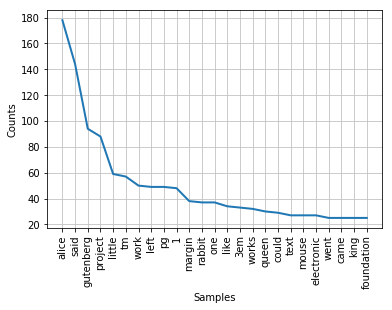

In [12]:
# This command display figures inline
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)

# Plotting the word frequency distribution

freqdist.plot(25)

## 9. The most common word
<p>The frequency distribution plot above is the answer to our question. </p>
<p>So, what word turned out to be the most common word in the book?</p>
<blackquote> 
alice!!!